## Lung Cancer Prediction project

### Table of Contents
- Introduction
- Load and Clean Dataset
- Exploratory Data Analysis
- Feature Engineering
- Modelling
- Conclusions



## Introduction

In this project I will load and manipulate a simple data frame named cancer_patient_data_sets.csv from Kaggle. Which contain information of 1000 patients with features as Age, Gender, Alcohol use, etc.. . We will trying to find a good model to predict a patient is got which level of lung cancer. Before building a model, We will manipulate the data frame to select which features will be good for the model.

First let's import the necessary libraries.

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


## Load and Clean Dataset
Our mini-dataset file is cancer_patient_data_sets.csv.

First the dataset must be loaded and cleaned, checking for invalid or missing data - for example, records with NaN value or non-numberic value.

In [49]:
df=pd.read_csv('cancer_patient_data_sets.csv')

In [50]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [51]:
df.shape


(1000, 26)

In [52]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


Checking any null value in the data frame.

In [53]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

The result show that there is no null value in the data frame. 

It's a fantastic input.

In [54]:
# let check the columns in the data frame
df.columns


Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [55]:
# we dont need Patient ID and Index, so clear them.
df.drop(["Patient Id" , "index"], axis = 1 , inplace = True)

In [56]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


It seems like column "Level" contain Categorical value, Let's check it out.

In [57]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

Fortunately, the "Level" column contains only 3 value : High, Medium and Low. 

Let's convert them to a numberic value such as 1, 2 and 3 whereas 3 is the highest level.

In [58]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

Let's check the column "Level" again to see how it is now.

In [59]:
df['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

Great! Now let's Explore our data and find some insights hidden in it.

## Exploratory Data Analysis

In [60]:
# Let see our data frame again.
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [61]:
# now, let's use seaborn to visualize each feature relation with lung cancer
sns.set()

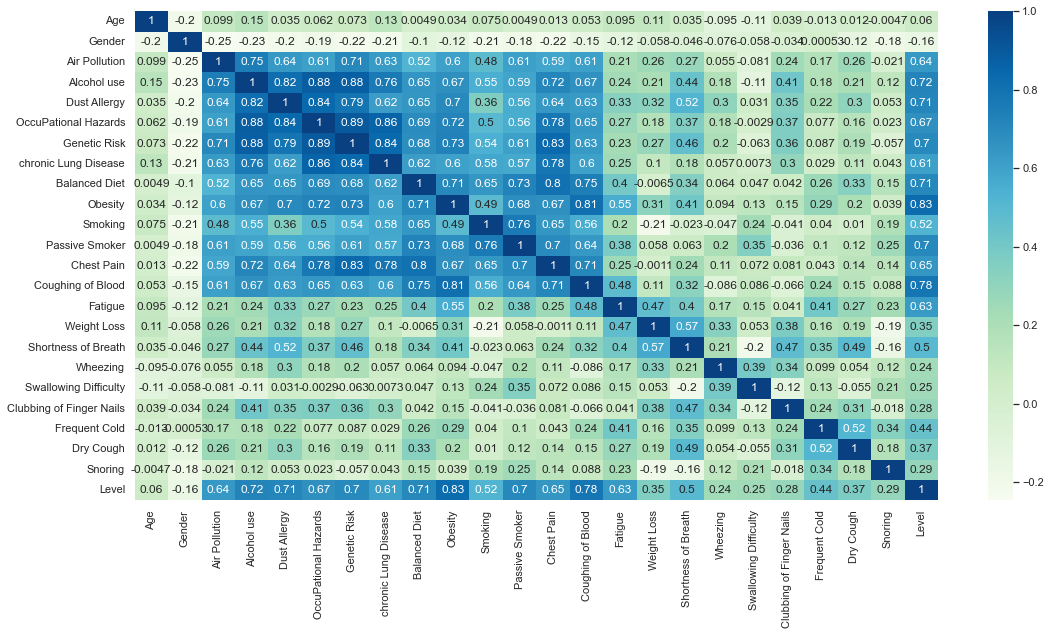

In [62]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.show()

As the heat map showing, those features from Air polution to Coughing of Blood are the most effect with level of lung cancer.

Let take a deeper look with heatmap.

<AxesSubplot:>

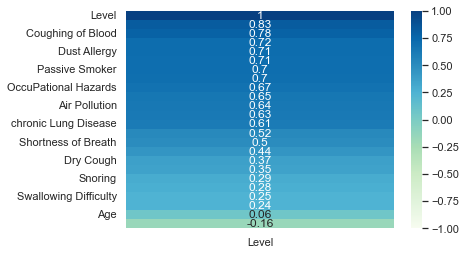

In [63]:
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

The map is showing that the most positively correlated features which is displayed at the top is Coughing of Blood. 

Let's take one more check about the Age relation with the level.

C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

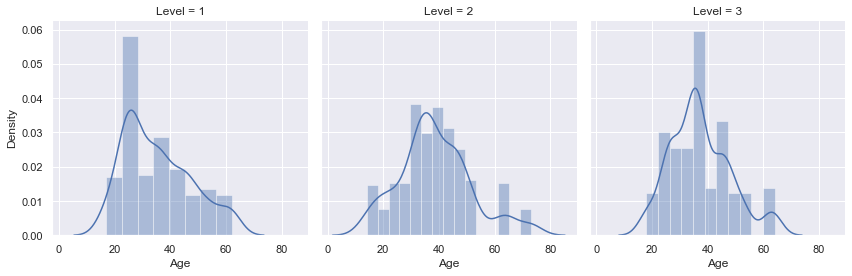

In [64]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Age")

C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bnnqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

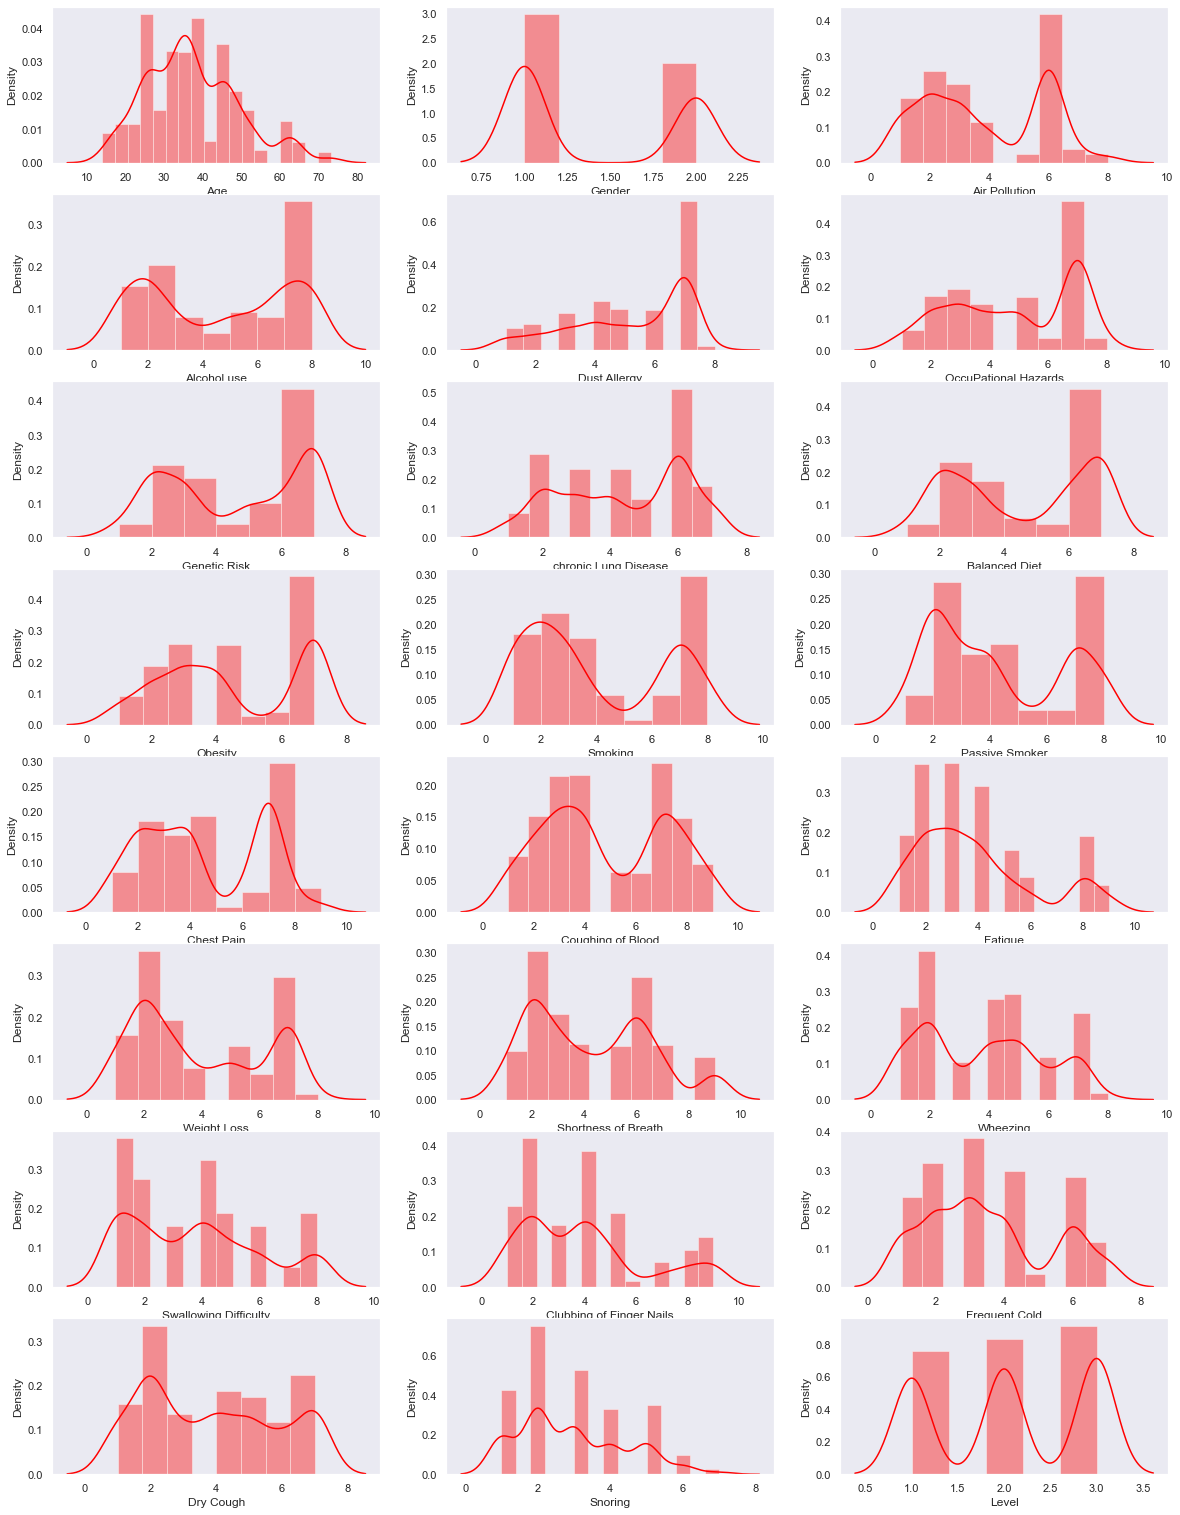

In [65]:
plt.figure(figsize = (20, 27))

for i in range(24):
    plt.subplot(8, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'red')
    plt.grid()

## Feature Engineering

with the seaborn heatmap, we could determine the most effective features are below:
- Age
- Coughing of Blood 
- Dust Allergy
- Passive Smoker
- OccuPational Hazards
- Air Pollution
- chronic Lung Disease
- Shortness of Breath 
- Dry Cough
- Snoring
- Swallowing Difficulty

Let keep those features and drop others and then building models.

In [66]:
df=df[['Age','Coughing of Blood','Dust Allergy',
       'Passive Smoker','OccuPational Hazards',
       'Air Pollution','chronic Lung Disease',
       'Shortness of Breath','Dry Cough',
       'Snoring','Swallowing Difficulty','Level']]

In [67]:
df.head()


,Age,Coughing of Blood,Dust Allergy,Passive Smoker,OccuPational Hazards,Air Pollution,chronic Lung Disease,Shortness of Breath,Dry Cough,Snoring,Swallowing Difficulty,Level
0,33,4,5,2,4,2,2,2,3,4,3,1
1,17,3,5,4,3,3,2,7,7,2,6,2
2,35,8,6,3,5,4,4,9,7,2,1,3
3,37,8,7,7,7,7,7,3,7,5,4,3
4,46,9,7,7,7,6,6,4,2,3,4,3



## Modelling

Now we have created our features dataFrame with only numeric variables, we can split the full dataset into train, test, and validation sets. We will test out different machine learning classification algorithms including:

- Logistic Regression
- Decision Tree Classifier
- GaussianNB

Now lets divide our datasets into train and test data

In [68]:
from sklearn.model_selection import train_test_split
X=df.drop('Level',axis=1)
y=df['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
#Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new_scaled = scaler.fit_transform(X_train)
X_test_new_scaled = scaler.transform(X_test)

In [70]:
#Applying Principal Component Analysis (PCA) for dimentionality Reduction

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_new_scaled)
X_test_pca = pca.transform(X_test_new_scaled)

In [79]:
X_train_pca.shape, X_test_pca.shape

((800, 8), (200, 8))

In [80]:
#Class Imbalance Handling using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_pca, y_test)

In [81]:
#Import Necessary Algorithm for train the model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(min_samples_split = 30)
svm_model = SVC()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier()

In [82]:
models = [
    log_model,
    dt_model,
    rf_model,
    svm_model,
    gnb_model,
    knn_model
]

In [83]:

def train_and_evaluate_models(models, X_train, y_train, X_test, y_test, cv):
    scores = {}
    for model in models:
        model_name = model.__class__.__name__
        
        # Perform cross-validation on the training data
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv).mean()
        
        print(model_name, 'training started')
    
        # start time
        start = time.time()
        # fit the models on train dataset
        # Train the model on the entire training set
        model.fit(X_train, y_train)
        # end time
        end = time.time()

        # print training ended
        print(model_name, 'training ended')
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy score on the test set
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the cross-validation scores in the 'scores' dictionary
        scores[model_name] = {
            'time trained': end-start,
            'test_accuracy_score': accuracy
        }
    return scores

In [84]:
score = train_and_evaluate_models(models, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled, 5)

LogisticRegression training started
LogisticRegression training ended
DecisionTreeClassifier training started
DecisionTreeClassifier training ended
RandomForestClassifier training started
RandomForestClassifier training ended
SVC training started
SVC training ended
GaussianNB training started
GaussianNB training ended
KNeighborsClassifier training started
KNeighborsClassifier training ended


In [85]:
df_sc = pd.DataFrame(score)

In [86]:
df_sc

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SVC,GaussianNB,KNeighborsClassifier
time trained,0.012999,0.003018,0.290034,0.012045,0.001990,0.004999
test_accuracy_score,0.963415,0.995935,1.000000,1.000000,0.934959,1.000000


## Conclusions

As we can see out of the eight different models, two models really performed so well that they gave and accuruacy of  100
 %. Still the gold medal of this notebook goes to  KNeighborasClassifier and the silver and bronze are SVC and Random Forest Classifer with a little longer time trained. The lineup is backed by Suport Vector Machines with an accuracy of almost  99.59
 %. 
  In the line we have GaussianNB with 93.49% but the time trained consumming is very impressive 0.001990 second!